In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [7]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [8]:
img_width = 180
img_height = 180

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [10]:
data_cat = data_train.class_names

In [11]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [12]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


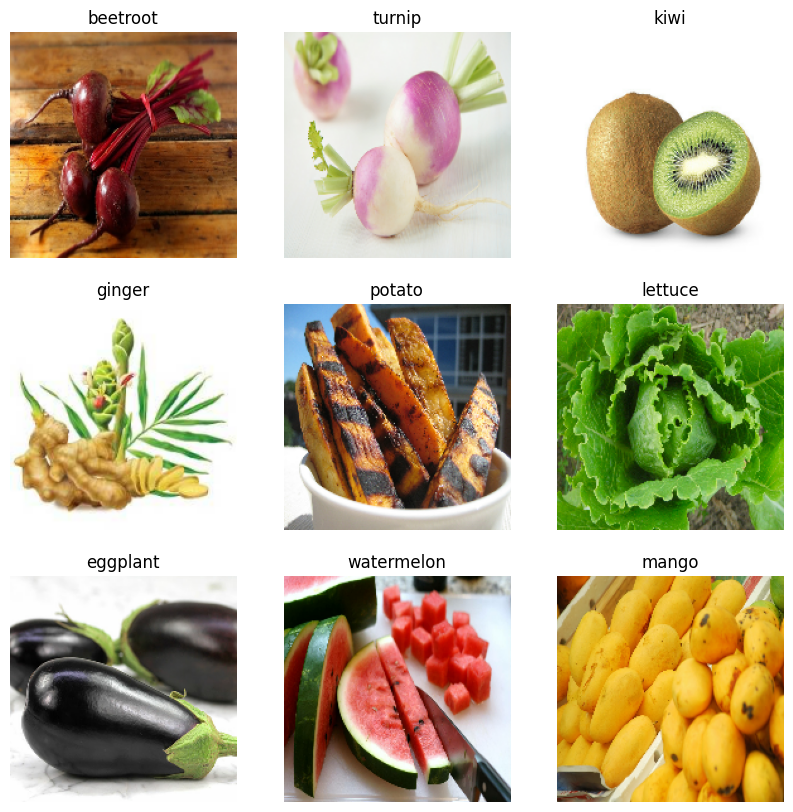

In [13]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [14]:
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [50]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [62]:
epochs_size = 50
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9914 - loss: 0.0214 - val_accuracy: 0.9544 - val_loss: 0.4730
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9573 - val_loss: 0.5009
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.9919 - loss: 0.0200 - val_accuracy: 0.9601 - val_loss: 0.4751
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.9905 - loss: 0.0228 - val_accuracy: 0.9459 - val_loss: 0.4640
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 250ms/step - accuracy: 0.9862 - loss: 0.0410 - val_accuracy: 0.9601 - val_loss: 0.4636
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.9900 - loss: 0.0306 - val_accuracy: 0.9573 - val_loss: 0.5297
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9891 - loss: 0.0219 - val_accuracy: 0.9573 - val_loss: 0.5787
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.9887 - loss: 0.0321 - val_accu

Text(0.5, 1.0, 'Loss')

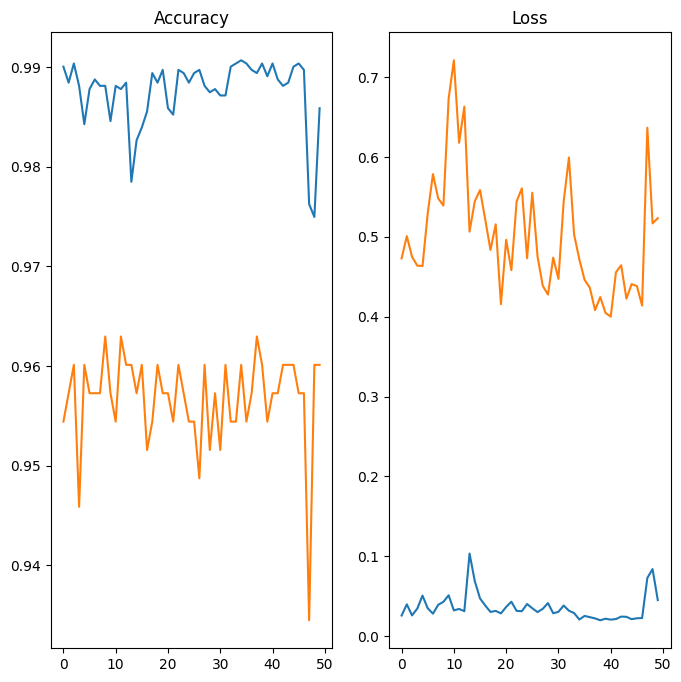

In [63]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [73]:
image = 'chilli.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [74]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [75]:
score = tf.nn.softmax(predict)

In [76]:
print('Vegetable or Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Vegetable or Fruit in image is paprika with accuracy of 100.00


In [77]:
model.save('Image_classify.keras')